In [50]:
import numpy as np
import os, glob, math, json, csv
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from collections import defaultdict, Counter
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Working with Images Lab
## Information retrieval, preprocessing, and feature extraction

In this lab, you'll work with images of felines (cats), which have been classified according to their taxonomy. Each subfolder contains images of a particular species. The dataset is located [here](https://www.kaggle.com/datasets/datahmifitb/felis-taxonomy-image-classification) but it's also provided to you in the `data/` folder.

### Problem 1. Some exploration (1 point)
How many types of cats are there? How many images do we have of each? What is a typical image size? Are there any outliers in size?

#### Types of Cats 
In the dataset we have seven types of cats - African wildcat, Blackfoot cat, Chinese mountain cat, Domestic cat, European wildcat, Jungle cat, Sand cat. 


#### Images of Each Type
- In African wildcat dataset we have 91 images;
- In Blackfoot cat dataset we have 79 images;
- In Chinese mountain cat dataset we have 42 images;
- In Domestic cat dataset we have 64 images;
- In European wildcat dataset we have 85 images;
- In Jungle cat dataset we have 86 images;
- In Sand cat dataset we have 72 images;

In [8]:
os.listdir("data/blackfoot-cat")

['bc (1).jpg',
 'bc (10).jpg',
 'bc (11).jpg',
 'bc (12).jpg',
 'bc (13).jpg',
 'bc (14).jpg',
 'bc (15).jpg',
 'bc (16).jpg',
 'bc (17).jpg',
 'bc (18).jpg',
 'bc (19).jpg',
 'bc (2).jpg',
 'bc (20).jpg',
 'bc (21).jpg',
 'bc (22).jpg',
 'bc (23).jpg',
 'bc (24).jpg',
 'bc (25).jpg',
 'bc (26).jpg',
 'bc (27).jpg',
 'bc (28).jpg',
 'bc (29).jpg',
 'bc (3).jpg',
 'bc (30).jpg',
 'bc (31).jpg',
 'bc (32).jpg',
 'bc (33).jpg',
 'bc (34).jpg',
 'bc (35).jpg',
 'bc (36).jpg',
 'bc (37).jpg',
 'bc (38).jpg',
 'bc (39).jpg',
 'bc (4).jpg',
 'bc (40).jpg',
 'bc (41).jpg',
 'bc (42).jpg',
 'bc (43).jpg',
 'bc (44).jpg',
 'bc (45).jpg',
 'bc (46).jpg',
 'bc (47).jpg',
 'bc (48).jpg',
 'bc (49).jpg',
 'bc (5).jpg',
 'bc (50).jpg',
 'bc (51).jpg',
 'bc (52).jpg',
 'bc (53).jpg',
 'bc (54).jpg',
 'bc (55).jpg',
 'bc (56).jpg',
 'bc (57).jpg',
 'bc (58).jpg',
 'bc (59).jpg',
 'bc (6).jpg',
 'bc (60).jpg',
 'bc (61).jpg',
 'bc (62).jpg',
 'bc (63).jpg',
 'bc (64).jpg',
 'bc (65).jpg',
 'bc (66).jpg'

In [9]:
os.listdir("data/chinese-mountain-cat")

['.ipynb_checkpoints',
 'ch (1).jpg',
 'ch (10).jpg',
 'ch (11).jpg',
 'ch (12).jpg',
 'ch (13).jpg',
 'ch (14).jpg',
 'ch (15).jpg',
 'ch (16).jpg',
 'ch (17).jpg',
 'ch (18).jpg',
 'ch (19).jpg',
 'ch (2).jpg',
 'ch (20).jpg',
 'ch (21).jpg',
 'ch (22).jpg',
 'ch (23).jpg',
 'ch (24).jpg',
 'ch (25).jpg',
 'ch (26).jpg',
 'ch (27).jpg',
 'ch (28).jpg',
 'ch (29).jpg',
 'ch (3).jpg',
 'ch (30).jpg',
 'ch (31).jpg',
 'ch (32).jpg',
 'ch (33).jpg',
 'ch (34).jpg',
 'ch (35).jpg',
 'ch (36).jpg',
 'ch (37).jpg',
 'ch (38).jpg',
 'ch (39).jpg',
 'ch (4).jpg',
 'ch (40).jpg',
 'ch (41).jpg',
 'ch (42).jpg',
 'ch (5).jpg',
 'ch (6).jpg',
 'ch (7).jpg',
 'ch (8).jpg',
 'ch (9).jpg']

In [10]:
os.listdir("data/domestic-cat")

['dc (1).jpg',
 'dc (10).jpg',
 'dc (11).jpg',
 'dc (12).jpg',
 'dc (13).jpg',
 'dc (14).jpg',
 'dc (15).jpg',
 'dc (16).jpg',
 'dc (17).jpg',
 'dc (18).jpg',
 'dc (19).jpg',
 'dc (2).jpg',
 'dc (20).jpg',
 'dc (21).jpg',
 'dc (22).jpg',
 'dc (23).jpg',
 'dc (24).jpg',
 'dc (25).jpg',
 'dc (26).jpg',
 'dc (27).jpg',
 'dc (28).jpg',
 'dc (29).jpg',
 'dc (3).jpg',
 'dc (30).jpg',
 'dc (31).jpg',
 'dc (32).jpg',
 'dc (33).jpg',
 'dc (34).jpg',
 'dc (35).jpg',
 'dc (36).jpg',
 'dc (37).jpg',
 'dc (38).jpg',
 'dc (39).jpg',
 'dc (4).jpg',
 'dc (40).jpg',
 'dc (41).jpg',
 'dc (42).jpg',
 'dc (43).jpg',
 'dc (44).jpg',
 'dc (45).jpg',
 'dc (46).jpg',
 'dc (47).jpg',
 'dc (48).jpg',
 'dc (49).jpg',
 'dc (5).jpg',
 'dc (50).jpg',
 'dc (51).jpg',
 'dc (52).jpg',
 'dc (53).jpg',
 'dc (54).jpg',
 'dc (55).jpg',
 'dc (56).jpg',
 'dc (57).jpg',
 'dc (58).jpg',
 'dc (59).jpg',
 'dc (6).jpg',
 'dc (60).jpg',
 'dc (61).jpg',
 'dc (62).jpg',
 'dc (63).jpg',
 'dc (64).jpg',
 'dc (7).jpg',
 'dc (8).jpg',


In [11]:
os.listdir("data/jungle-cat")

['jg (1).jpg',
 'jg (10).jpg',
 'jg (11).jpg',
 'jg (12).jpg',
 'jg (13).jpg',
 'jg (14).jpg',
 'jg (15).jpg',
 'jg (16).jpg',
 'jg (17).jpg',
 'jg (18).jpg',
 'jg (19).jpg',
 'jg (2).jpg',
 'jg (20).jpg',
 'jg (21).jpg',
 'jg (22).jpg',
 'jg (23).jpg',
 'jg (24).jpg',
 'jg (25).jpg',
 'jg (26).jpg',
 'jg (27).jpg',
 'jg (28).jpg',
 'jg (29).jpg',
 'jg (3).jpg',
 'jg (30).jpg',
 'jg (31).jpg',
 'jg (32).jpg',
 'jg (33).jpg',
 'jg (34).jpg',
 'jg (35).jpg',
 'jg (36).jpg',
 'jg (37).jpg',
 'jg (38).jpg',
 'jg (39).jpg',
 'jg (4).jpg',
 'jg (40).jpg',
 'jg (41).jpg',
 'jg (42).jpg',
 'jg (43).jpg',
 'jg (44).jpg',
 'jg (45).jpg',
 'jg (46).jpg',
 'jg (47).jpg',
 'jg (48).jpg',
 'jg (49).jpg',
 'jg (5).jpg',
 'jg (50).jpg',
 'jg (51).jpg',
 'jg (52).jpg',
 'jg (53).jpg',
 'jg (54).jpg',
 'jg (55).jpg',
 'jg (56).jpg',
 'jg (57).jpg',
 'jg (58).jpg',
 'jg (59).jpg',
 'jg (6).jpg',
 'jg (60).jpg',
 'jg (61).jpg',
 'jg (62).jpg',
 'jg (63).jpg',
 'jg (64).jpg',
 'jg (65).jpg',
 'jg (66).jpg'

In [12]:
os.listdir("data/european-wildcat")

['eu (1).jpg',
 'eu (10).jpg',
 'eu (11).jpg',
 'eu (12).jpg',
 'eu (13).jpg',
 'eu (14).jpg',
 'eu (15).jpg',
 'eu (16).jpg',
 'eu (17).jpg',
 'eu (18).jpg',
 'eu (19).jpg',
 'eu (2).jpg',
 'eu (20).jpg',
 'eu (21).jpg',
 'eu (22).jpg',
 'eu (23).jpg',
 'eu (24).jpg',
 'eu (25).jpg',
 'eu (26).jpg',
 'eu (27).jpg',
 'eu (28).jpg',
 'eu (29).jpg',
 'eu (3).jpg',
 'eu (30).jpg',
 'eu (31).jpg',
 'eu (32).jpg',
 'eu (33).jpg',
 'eu (34).jpg',
 'eu (35).jpg',
 'eu (36).jpg',
 'eu (37).jpg',
 'eu (38).jpg',
 'eu (39).jpg',
 'eu (4).jpg',
 'eu (40).jpg',
 'eu (41).jpg',
 'eu (42).jpg',
 'eu (43).jpg',
 'eu (44).jpg',
 'eu (45).jpg',
 'eu (46).jpg',
 'eu (47).jpg',
 'eu (48).jpg',
 'eu (49).jpg',
 'eu (5).jpg',
 'eu (50).jpg',
 'eu (51).jpg',
 'eu (52).jpg',
 'eu (53).jpg',
 'eu (54).jpg',
 'eu (55).jpg',
 'eu (56).jpg',
 'eu (57).jpg',
 'eu (58).jpg',
 'eu (59).jpg',
 'eu (6).jpg',
 'eu (60).jpg',
 'eu (61).jpg',
 'eu (62).jpg',
 'eu (63).jpg',
 'eu (64).jpg',
 'eu (65).jpg',
 'eu (66).jpg'

In [13]:
os.listdir("data/sand-cat")

['.ipynb_checkpoints',
 'sd (1).jpg',
 'sd (10).jpg',
 'sd (11).jpg',
 'sd (12).jpg',
 'sd (13).jpg',
 'sd (14).jpg',
 'sd (15).jpg',
 'sd (16).jpg',
 'sd (17).jpg',
 'sd (18).jpg',
 'sd (19).jpg',
 'sd (2).jpg',
 'sd (20).jpg',
 'sd (21).jpg',
 'sd (22).jpg',
 'sd (23).jpg',
 'sd (24).jpg',
 'sd (25).jpg',
 'sd (26).jpg',
 'sd (27).jpg',
 'sd (28).jpg',
 'sd (29).jpg',
 'sd (3).jpg',
 'sd (30).jpg',
 'sd (31).jpg',
 'sd (32).jpg',
 'sd (33).jpg',
 'sd (34).jpg',
 'sd (35).jpg',
 'sd (36).jpg',
 'sd (37).jpg',
 'sd (38).jpg',
 'sd (39).jpg',
 'sd (4).jpg',
 'sd (40).jpg',
 'sd (41).jpg',
 'sd (42).jpg',
 'sd (43).jpg',
 'sd (44).jpg',
 'sd (45).jpg',
 'sd (46).jpg',
 'sd (47).jpg',
 'sd (48).jpg',
 'sd (49).jpg',
 'sd (5).jpg',
 'sd (50).jpg',
 'sd (51).jpg',
 'sd (52).jpg',
 'sd (53).jpg',
 'sd (54).jpg',
 'sd (55).jpg',
 'sd (56).jpg',
 'sd (57).jpg',
 'sd (58).jpg',
 'sd (59).jpg',
 'sd (6).jpg',
 'sd (60).jpg',
 'sd (61).jpg',
 'sd (62).jpg',
 'sd (63).jpg',
 'sd (64).jpg',
 'sd (6

In [14]:
os.listdir("data/african-wildcat")

['af (1).jpg',
 'af (10).jpg',
 'af (11).jpg',
 'af (12).jpg',
 'af (13).jpg',
 'af (14).jpg',
 'af (15).jpg',
 'af (16).jpg',
 'af (17).jpg',
 'af (18).jpg',
 'af (19).jpg',
 'af (2).jpg',
 'af (20).jpg',
 'af (21).jpg',
 'af (22).jpg',
 'af (23).jpg',
 'af (24).jpg',
 'af (25).jpg',
 'af (26).jpg',
 'af (27).jpg',
 'af (28).jpg',
 'af (29).jpg',
 'af (3).jpg',
 'af (30).jpg',
 'af (31).jpg',
 'af (32).jpg',
 'af (33).jpg',
 'af (34).jpg',
 'af (35).jpg',
 'af (36).jpg',
 'af (37).jpg',
 'af (38).jpg',
 'af (39).jpg',
 'af (4).jpg',
 'af (40).jpg',
 'af (41).jpg',
 'af (42).jpg',
 'af (43).jpg',
 'af (44).jpg',
 'af (45).jpg',
 'af (46).jpg',
 'af (47).jpg',
 'af (48).jpg',
 'af (49).jpg',
 'af (5).jpg',
 'af (50).jpg',
 'af (51).jpg',
 'af (52).jpg',
 'af (53).jpg',
 'af (54).jpg',
 'af (55).jpg',
 'af (56).jpg',
 'af (57).jpg',
 'af (58).jpg',
 'af (59).jpg',
 'af (6).jpg',
 'af (60).jpg',
 'af (61).jpg',
 'af (62).jpg',
 'af (63).jpg',
 'af (64).jpg',
 'af (65).jpg',
 'af (66).jpg'

#### Typical Image Size and Outliers

In [16]:
files1 = os.listdir("data/african-wildcat")
files2 = os.listdir("data/blackfoot-cat")
files3 = os.listdir("data/chinese-mountain-cat")
files4 = os.listdir("data/domestic-cat")
files5 = os.listdir("data/european-wildcat")
files6 = os.listdir("data/jungle-cat")
files7 = os.listdir("data/sand-cat")
cat_files = files1 + files2 + files3 + files4 + files5 + files6 + files7

In [17]:
# Supported image extensions
IMAGE_EXTENSIONS = ('.jpg', '.jpeg', '.png')

# Folders to scan
folders = [
    "data/african-wildcat",
    "data/blackfoot-cat",
    "data/sand-cat",
    "data/chinese-mountain-cat",
    "data/domestic-cat",
    "data/european-wildcat",
    "data/jungle-cat"
]

# Step 1: Collect image paths and sizes
image_data = []
for folder in folders:
    for file in os.listdir(folder):
        full_path = os.path.join(folder, file)
        if os.path.isfile(full_path) and file.lower().endswith(IMAGE_EXTENSIONS):
            try:
                with Image.open(full_path) as img:
                    width, height = img.size
                    image_data.append((full_path, width, height))
            except Exception as e:
                print(f"Error reading {full_path}: {e}")

# Step 2: Create DataFrame
df = pd.DataFrame(image_data, columns=["path", "width", "height"])

# Step 3: Count most common sizes
size_counts = Counter([(w, h) for _, w, h in image_data])
most_common = size_counts.most_common()

print("Most common image sizes (width x height):")
for size, count in most_common[:10]:  # show top 10
    print(f"{size[0]} x {size[1]} - {count} images")

# Step 4: Average size
if not df.empty:
    avg_width = df["width"].mean()
    avg_height = df["height"].mean()
    print(f"\n Average size: {avg_width:.1f} x {avg_height:.1f} pixels")


# Step 1: Compute area and size
df["area"] = df["width"] * df["height"]
df["size"] = list(zip(df["width"], df["height"]))

# Step 2: Group by size and count
size_counts = df.groupby("size").agg(
    count=("size", "count"),
    width=("width", "first"),
    height=("height", "first"),
    area=("area", "first")
).reset_index(drop=True)

# Step 3: IQR outlier detection function
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)

# Step 4: Apply IQR on width & height
size_counts["outlier_width"] = detect_outliers(size_counts["width"])
size_counts["outlier_height"] = detect_outliers(size_counts["height"])
size_counts["is_outlier"] = size_counts["outlier_width"] | size_counts["outlier_height"]

# Step 5: Filter to only outliers with high counts
threshold = 3
filtered_outliers = size_counts[(size_counts["is_outlier"]) & (size_counts["count"] >= threshold)]

# Step 6: Show outlier size summaries
print(f"\n Outlier sizes that appear at least {threshold} times:")
for _, row in filtered_outliers.iterrows():
    print(f"{row['width']} x {row['height']} - {row['count']} images")

# Step 7: Get actual image paths from df
outlier_sizes = set(zip(filtered_outliers["width"], filtered_outliers["height"]))
outlier_df = df[df["size"].isin(outlier_sizes)]

print(f"\n Total outlier images after filtering: {len(outlier_df)}")
print(outlier_df[["path", "width", "height"]].to_string(index=False))

Most common image sizes (width x height):
275 x 183 - 108 images
259 x 194 - 30 images
225 x 225 - 22 images
183 x 275 - 18 images
300 x 168 - 12 images
262 x 192 - 12 images
265 x 190 - 10 images
251 x 201 - 8 images
276 x 183 - 7 images
194 x 259 - 6 images

 Average size: 406.6 x 310.9 pixels

 Outlier sizes that appear at least 3 times:
1280 x 720 - 3 images
1300 x 866 - 3 images
1300 x 956 - 3 images
2000 x 1333 - 4 images

 Total outlier images after filtering: 13
                                 path  width  height
data/chinese-mountain-cat\ch (35).jpg   1280     720
data/chinese-mountain-cat\ch (36).jpg   1280     720
    data/european-wildcat\eu (10).jpg   2000    1333
    data/european-wildcat\eu (15).jpg   1300     866
    data/european-wildcat\eu (26).jpg   2000    1333
    data/european-wildcat\eu (29).jpg   1300     956
     data/european-wildcat\eu (3).jpg   2000    1333
    data/european-wildcat\eu (46).jpg   1300     956
    data/european-wildcat\eu (58).jpg   1280    

### Problem 2. Duplicat(e)s (1 point)
Find a way to filter out (remove) identical images. I would recommnend using file hashes, but there are many approaches. Keep in mind that during file saving, recompression, etc., a lot of artifacts can change the file content (bytes), but not visually.

In [19]:
folders = [
    "data/african-wildcat",
    "data/blackfoot-cat",
    "data/chinese-mountain-cat",
    "data/domestic-cat",
    "data/european-wildcat",
    "data/jungle-cat",
    "data/sand-cat"
]

In [20]:
!pip install imagehash pillow

In [21]:
IMAGE_EXTENSIONS = ('.jpg', '.jpeg', '.png')
folders = [
    "data/african-wildcat",
    "data/blackfoot-cat",
    "data/chinese-mountain-cat",
    "data/domestic-cat",
    "data/european-wildcat",
    "data/jungle-cat",
    "data/sand-cat"
]

hash_dict = defaultdict(list)
duplicate_paths = []

for folder in folders:
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        if os.path.isfile(path) and fname.lower().endswith(IMAGE_EXTENSIONS):
            try:
                with Image.open(path) as img:
                    hash_val = imagehash.phash(img)  # perceptual hash
                    if hash_val in hash_dict:
                        duplicate_paths.append(path)  # This is a duplicate
                    else:
                        hash_dict[hash_val].append(path)
            except Exception as e:
                print(f"❌ Error with file {path}: {e}")

print(f"✅ Found {len(duplicate_paths)} duplicates:")
for dup in duplicate_paths:
    print(dup)

❌ Error with file data/african-wildcat\af (1).jpg: name 'imagehash' is not defined
❌ Error with file data/african-wildcat\af (10).jpg: name 'imagehash' is not defined
❌ Error with file data/african-wildcat\af (11).jpg: name 'imagehash' is not defined
❌ Error with file data/african-wildcat\af (12).jpg: name 'imagehash' is not defined
❌ Error with file data/african-wildcat\af (13).jpg: name 'imagehash' is not defined
❌ Error with file data/african-wildcat\af (14).jpg: name 'imagehash' is not defined
❌ Error with file data/african-wildcat\af (15).jpg: name 'imagehash' is not defined
❌ Error with file data/african-wildcat\af (16).jpg: name 'imagehash' is not defined
❌ Error with file data/african-wildcat\af (17).jpg: name 'imagehash' is not defined
❌ Error with file data/african-wildcat\af (18).jpg: name 'imagehash' is not defined
❌ Error with file data/african-wildcat\af (19).jpg: name 'imagehash' is not defined
❌ Error with file data/african-wildcat\af (2).jpg: name 'imagehash' is not de

### Problem 3. Loading a model (2 points)
Find a suitable, trained convolutional neural network classifier. I recommend `ResNet50` as it's small enough to run well on any machine and powerful enough to make reasonable predictions. Most ready-made classifiers have been trained for 1000 classes.

You'll need to install libraries and possibly tinker with configurations for this task. When you're done, display the total number of layers and the total number of parameters. For ResNet50, you should expect around 50 layers and 25M parameters.

In [23]:
model = ResNet50(weights='imagenet', include_top=True)

In [24]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [25]:
print(f"\n🔍 Total layers: {len(model.layers)}")
print(f"🧮 Total parameters: {model.count_params():,}")


🔍 Total layers: 177
🧮 Total parameters: 25,636,712


### Problem 4. Prepare the images (1 point)
You'll need to prepare the images for passing to the model. To do so, they have to be resized to the same dimensions. Most available models have a specific requirement for sizes. You may need to do additional preprocessing, depending on the model requirements. These requirements should be easily available in the model documentation.

In [27]:
# === TensorFlow: Efficient batched preprocessing + optional shard saving ===

# ------------------- CONFIG -------------------
DATA_DIR   = "data"          # folder with class subfolders, e.g. data/class1, data/class2, ...
IMG_SIZE   = (224, 224)      # ResNet50 expects 224x224
BATCH_SIZE = 4               # task requirement
SHARD_SIZE = 64              # how many samples per .npz file when saving
OUT_DIR    = "preprocessed_npz_tf"  # where to write shards
SAVE_SHARDS = True           # set False if you only want the streaming dataset
CACHE_IN_RAM = False         # set True to cache preprocessed tensors in RAM (small datasets only)
# ----------------------------------------------

# 1) Build (file_path, label) lists
classes = sorted([d for d in tf.io.gfile.listdir(DATA_DIR)
                  if tf.io.gfile.isdir(tf.io.gfile.join(DATA_DIR, d))])
class_to_idx = {c: i for i, c in enumerate(classes)}

file_paths, labels = [], []
for c in classes:
    for p in sorted(glob.glob(os.path.join(DATA_DIR, c, "*"))):
        file_paths.append(p)
        labels.append(class_to_idx[c])

print(f"Found {len(file_paths)} images across {len(classes)} classes: {classes}")

# 2) tf.data pipeline: stream -> decode -> resize -> preprocess -> batch -> prefetch
paths_ds  = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels)
ds = tf.data.Dataset.zip((paths_ds, labels_ds))

def load_and_preprocess(path, label):
    img_bytes = tf.io.read_file(path)
    img = tf.image.decode_image(img_bytes, channels=3, expand_animations=False)   # supports jpg/png
    img = tf.image.resize(img, IMG_SIZE)                                         # (224,224,3)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)                                                  # ResNet50 normalization
    return img, label

ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
if CACHE_IN_RAM:
    ds = ds.cache()  # keeps preprocessed tensors in RAM; fine for small datasets
ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Quick sanity check: load one batch
for xb, yb in ds.take(1):
    print("One batch:", xb.shape, yb.shape)  # (4, 224, 224, 3) and (4,)
    break

# 3) (Optional) Save preprocessed arrays to .npz shards for lazy loading later
if SAVE_SHARDS:
    tf.io.gfile.makedirs(OUT_DIR)
    with tf.io.gfile.GFile(os.path.join(OUT_DIR, "labels.json"), "w") as f:
        json.dump({"classes": classes, "class_to_idx": class_to_idx}, f, indent=2)

    shard_imgs, shard_labs = [], []
    shard_idx, written = 0, 0
    for xb, yb in ds:  # xb (N,224,224,3) float32 already normalized; yb (N,)
        xb_np = xb.numpy()
        yb_np = yb.numpy().astype(np.int64)
        for i in range(len(xb_np)):
            shard_imgs.append(xb_np[i])
            shard_labs.append(yb_np[i])
            written += 1
            if len(shard_imgs) == SHARD_SIZE:
                np.savez_compressed(
                    os.path.join(OUT_DIR, f"shard_{shard_idx:05d}.npz"),
                    images=np.stack(shard_imgs, axis=0),  # (SHARD_SIZE, 224, 224, 3)
                    labels=np.array(shard_labs, dtype=np.int64)
                )
                shard_idx += 1
                shard_imgs, shard_labs = [], []
    # flush remainder
    if shard_imgs:
        np.savez_compressed(
            os.path.join(OUT_DIR, f"shard_{shard_idx:05d}.npz"),
            images=np.stack(shard_imgs, axis=0),
            labels=np.array(shard_labs, dtype=np.int64)
        )
    print(f"Saved {written} samples into {shard_idx + 1} shard(s) under '{OUT_DIR}'.")

# 4) Helper to lazily iterate saved shards later (no JPEG decode, no preprocessing)
def iterate_npz_shards(out_dir=OUT_DIR):
    shard_files = sorted(glob.glob(os.path.join(out_dir, "shard_*.npz")))
    for sf in shard_files:
        payload = np.load(sf)
        yield payload["images"], payload["labels"]

# Example usage (uncomment when you want to load preprocessed data lazily):
# for imgs, labs in iterate_npz_shards(OUT_DIR):
#     print("Loaded shard:", imgs.shape, labs.shape)  # e.g., (64, 224, 224, 3) (64,)
#     # You can now call model.predict(imgs) directly (Keras expects NHWC float32)

Found 519 images across 7 classes: ['african-wildcat', 'blackfoot-cat', 'chinese-mountain-cat', 'domestic-cat', 'european-wildcat', 'jungle-cat', 'sand-cat']
One batch: (4, 224, 224, 3) (4,)
Saved 519 samples into 9 shard(s) under 'preprocessed_npz_tf'.


### Problem 5. Load the images efficiently (1 point)
Now that you've seen how to prepare the images for passing to the model... find a way to do it efficiently. Instead of loading the entire dataset in the RAM, read the images in batches (e.g. 4 images at a time). The goal is to read these, preprocess them, maybe save the preprocessed results in RAM.

If you've already done this in one of the previous problems, just skip this one. You'll get your point for it.

\* Even better, save the preprocessed image arrays (they will not be valid .jpg file) as separate files, so you can load them "lazily" in the following steps. This is a very common optimization to work with large datasets.

I did this in problem 4 and the 519 images are saved to 6 shard(s) in the folder preprocessed_npz_tf.
Those image are preprocessed and can be load "lazily" in the model.

### Problem 6. Predictions (1 point)
Finally, you're ready to get into the meat of the problem. Obtain predictions from your model and evaluate them. This will likely involve manual work to decide how the returned classes relate to the original ones.

Create a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to evaluate the classification.

In [31]:
OUT_DIR = "preprocessed_npz_tf"  # where your shards live
BATCH_SIZE = 64                  # preprocessed already; you can go big
PRED_CSV = "top5_imagenet_preds.csv"

# Load class index mapping used when you saved shards
with open(os.path.join(OUT_DIR, "labels.json"), "r", encoding="utf-8") as f:
    meta = json.load(f)
classes = meta["classes"]                # list like ['african-wildcat', ...]
idx_to_class = {i:c for c,i in meta["class_to_idx"].items()}  # invert

# Load model
model = ResNet50(weights="imagenet")

# Helper to stream shards
def iterate_npz_shards(out_dir=OUT_DIR):
    shard_files = sorted(glob.glob(os.path.join(out_dir, "shard_*.npz")))
    for sf in shard_files:
        payload = np.load(sf)
        yield payload["images"], payload["labels"]   # (N,224,224,3), (N,)

# Predict and write a CSV with top-5 ImageNet labels per image
# Columns: true_class, pred1_name, pred1_prob, ..., pred5_name, pred5_prob
with open(PRED_CSV, "w", newline="", encoding="utf-8") as f:
    w = csv.writer(f)
    w.writerow(["true_class",
                "pred1_name","pred1_prob",
                "pred2_name","pred2_prob",
                "pred3_name","pred3_prob",
                "pred4_name","pred4_prob",
                "pred5_name","pred5_prob"])

    total = 0
    for imgs, labs in iterate_npz_shards(OUT_DIR):
        # imgs are already preprocessed for ResNet50
        for i in range(0, len(imgs), BATCH_SIZE):
            batch = imgs[i:i+BATCH_SIZE]
            preds = model.predict(batch, verbose=0)            # (B,1000)
            decoded = decode_predictions(preds, top=5)         # list of lists
            for d, lbl in zip(decoded, labs[i:i+BATCH_SIZE]):
                row = [idx_to_class[int(lbl)]]
                for (_, name, prob) in d:
                    row += [name, f"{prob:.6f}"]
                w.writerow(row)
                total += 1

print(f"Wrote top-5 predictions for {total} images to {PRED_CSV}")
print("Open it, scan which ImageNet labels show up for each of your classes,")
print("and decide a mapping (next step).")

Wrote top-5 predictions for 519 images to top5_imagenet_preds.csv
Open it, scan which ImageNet labels show up for each of your classes,
and decide a mapping (next step).


In [32]:
%%writefile imagenet_to_target.csv
imagenet_label,target_class
# Domestic cat
tabby,domestic-cat
Egyptian_cat,domestic-cat
Persian_cat,domestic-cat
Siamese_cat,domestic-cat
Angora,domestic-cat
# European wildcat
lynx,european-wildcat
wild_boar,european-wildcat
great_grey_owl,european-wildcat
# Jungle cat
leopard,jungle-cat
jaguar,jungle-cat
puma,jungle-cat
cougar,jungle-cat
tiger,jungle-cat
dhole,jungle-cat
dingo,jungle-cat
red_wolf,jungle-cat
ibex,jungle-cat
wildcat,jungle-cat
grey_fox,jungle-cat
# African wildcat
grey_fox,african-wildcat
coyote,african-wildcat
timber_wolf,african-wildcat 
lion,african-wildcat
hyena,african-wildcat
gazelle,african-wildcat
zebra,african-wildcat
# Blackfoot cat
caracal,blackfoot-cat
ocelot,blackfoot-cat
hog,blackfoot-cat
tiger_cat,blackfoot-cat
leopard,blackfoot-cat
cheetah,blackfoot-cat 
# Chinese mountain cat
snow_leopard,chinese-mountain-cat
hare,chinese-mountain-cat 
wood_rabbit,chinese-mountain-cat 
fox_squirrel,chinese-mountain-cat 
wallaby,chinese-mountain-cat
wombat,chinese-mountain-cat 
# Sand cat
sand_cat,sand-cat
kit_fox,sand-cat
Arctic_fox,sand-cat
white_wolf,sand-cat
red_fox,sand-cat
mongoose,sand-cat 
meerkat,sand-cat

Overwriting imagenet_to_target.csv


In [33]:
PRED_CSV = "top5_imagenet_preds.csv"
MAP_CSV  = "imagenet_to_target.csv"
UNKNOWN_CLASS = "unknown"  # bucket for unmapped predictions

# Load mapping (imagenet_label -> your target class)
imap = {}
with open(MAP_CSV, "r", encoding="utf-8") as f:
    rdr = csv.DictReader(f)
    for row in rdr:
        k = (row.get("imagenet_label") or "").strip()
        v = (row.get("target_class") or "").strip()
        if k and v:   # only add if both key and value are non-empty
            imap[k] = v

print("Loaded", len(imap), "mappings")
print(list(imap.items())[:10])  # sanity check

# Helper: given a top-5 list [(name,prob),...], map to your class
# Strategy: pick highest-prob label that exists in mapping; else UNKNOWN
def map_top5_to_target(top5_pairs):
    for name, prob in top5_pairs:   # already ordered by prob desc
        if name in imap:
            return imap[name]
    return UNKNOWN_CLASS

y_true, y_pred = [], []

with open(PRED_CSV, "r", encoding="utf-8") as f:
    rdr = csv.reader(f)
    header = next(rdr)
    # column indices
    true_idx = header.index("true_class")
    # Build structured rows
    for row in rdr:
        true_class = row[true_idx]
        # pull top-5 (name,prob) pairs
        pairs = []
        for k in [("pred1_name","pred1_prob"),
                  ("pred2_name","pred2_prob"),
                  ("pred3_name","pred3_prob"),
                  ("pred4_name","pred4_prob"),
                  ("pred5_name","pred5_prob")]:
            n_idx = header.index(k[0]); p_idx = header.index(k[1])
            name = row[n_idx]
            prob = float(row[p_idx])
            pairs.append((name, prob))
        pred_class = map_top5_to_target(pairs)
        y_true.append(true_class)
        y_pred.append(pred_class)

# Restrict labels to your known classes (plus unknown if present)
all_labels = sorted(list(set(y_true) | set(y_pred)))
if UNKNOWN_CLASS in set(y_pred):
    if UNKNOWN_CLASS not in all_labels:
        all_labels.append(UNKNOWN_CLASS)

# Metrics
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, labels=all_labels, zero_division=0))

Loaded 43 mappings
[('tabby', 'domestic-cat'), ('Egyptian_cat', 'domestic-cat'), ('Persian_cat', 'domestic-cat'), ('Siamese_cat', 'domestic-cat'), ('Angora', 'domestic-cat'), ('lynx', 'european-wildcat'), ('wild_boar', 'european-wildcat'), ('great_grey_owl', 'european-wildcat'), ('leopard', 'blackfoot-cat'), ('jaguar', 'jungle-cat')]
=== Classification Report ===
                      precision    recall  f1-score   support

     african-wildcat       0.24      0.18      0.20        91
       blackfoot-cat       0.42      0.32      0.36        79
chinese-mountain-cat       0.20      0.14      0.17        42
        domestic-cat       0.28      0.52      0.36        64
    european-wildcat       0.24      0.53      0.33        85
          jungle-cat       0.22      0.08      0.12        86
            sand-cat       0.45      0.14      0.21        72
             unknown       0.00      0.00      0.00         0

            accuracy                           0.27       519
           m

,african-wildcat,blackfoot-cat,chinese-mountain-cat,domestic-cat,european-wildcat,jungle-cat,sand-cat,unknown
african-wildcat,16,3,7,19,44,2,0,0
blackfoot-cat,2,25,2,20,18,12,0,0
chinese-mountain-cat,3,2,6,5,23,1,2,0
domestic-cat,2,12,3,33,10,1,2,1
european-wildcat,5,18,2,14,45,0,1,0
jungle-cat,32,0,10,4,26,7,7,0
sand-cat,8,0,0,23,22,9,10,0
unknown,0,0,0,0,0,0,0,0


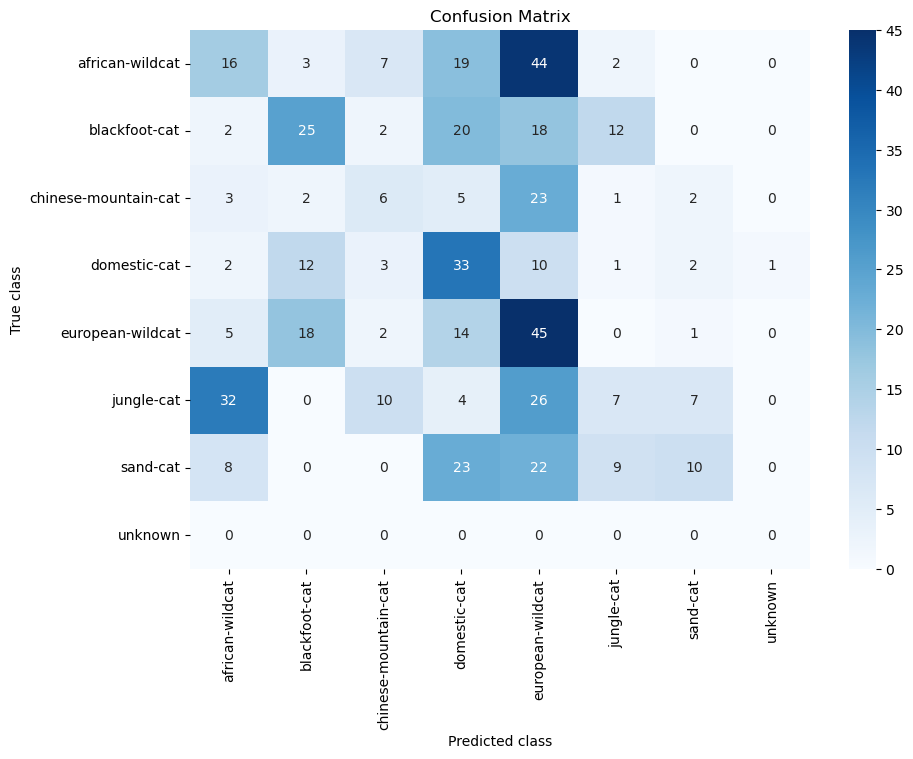

In [34]:
# Suppose y_true and y_pred are your labels
labels = ["african-wildcat", "blackfoot-cat", "chinese-mountain-cat", 
          "domestic-cat", "european-wildcat", "jungle-cat", "sand-cat", "unknown"]

cm = confusion_matrix(y_true, y_pred, labels=labels)

# Option 1: Pretty DataFrame
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
display(cm_df)

# Option 2: Heatmap visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix")
plt.show()

In [35]:
# === Config ===
PRED_CSV = "top5_imagenet_preds.csv"     # from earlier prediction step
MAP_CSV  = "imagenet_to_target.csv"      # current mapping file
TOP_K    = 30

# === 1) Load mapping (robust) ===
imap = {}
try:
    with open(MAP_CSV, "r", newline="", encoding="utf-8") as f:
        rdr = csv.DictReader(f)
        print("Mapping CSV headers:", rdr.fieldnames)
        bad_rows = 0
        for i, row in enumerate(rdr, start=2):
            k = (row.get("imagenet_label") or "").strip()
            v = (row.get("target_class")   or "").strip()
            if k and v:
                imap[k] = v
            else:
                bad_rows += 1
        if bad_rows:
            print(f"⚠️ Skipped {bad_rows} mapping row(s) with empty/missing values.")
except FileNotFoundError:
    print(f"⚠️ Mapping file '{MAP_CSV}' not found. Proceeding with empty mapping.")

# Define 'mapped' immediately after building 'imap'
mapped = set(imap.keys())

# === 2) Read predictions & tally ===
freq_all = Counter()
freq_unmapped = Counter()
per_true_unmapped = defaultdict(lambda: Counter())  # label -> (true_class -> count)

with open(PRED_CSV, "r", encoding="utf-8", newline="") as f:
    rdr = csv.DictReader(f)
    if not rdr.fieldnames:
        raise ValueError(f"No headers found in {PRED_CSV}")
    top_cols = [c for c in rdr.fieldnames if c and c.startswith("pred") and c.endswith("_name")]
    if "true_class" not in rdr.fieldnames:
        raise KeyError("Column 'true_class' missing from predictions CSV")

    for row in rdr:
        true_cls = (row.get("true_class") or "").strip()
        labels = [(row.get(c) or "").strip() for c in top_cols]
        for lbl in labels:
            if not lbl:
                continue
            freq_all[lbl] += 1
            if lbl not in mapped:
                freq_unmapped[lbl] += 1
                if true_cls:
                    per_true_unmapped[lbl][true_cls] += 1

# === 3) Print top-N unmapped labels ===
print(f"\n=== Top {TOP_K} UNMAPPED labels (overall frequency across top-5) ===")
for lbl, cnt in freq_unmapped.most_common(TOP_K):
    print(f"{lbl:20s}  {cnt}")

# === 4) Per-true-class breakdown for those labels ===
def top_k_true_classes(counter, k=5):
    return ", ".join(f"{cls}:{n}" for cls, n in counter.most_common(k))

print(f"\n=== Per-true-class breakdown for top {TOP_K} unmapped labels ===")
for lbl, cnt in freq_unmapped.most_common(TOP_K):
    breakdown = top_k_true_classes(per_true_unmapped[lbl], k=5)
    print(f"{lbl:20s}  total={cnt:4d}  ->  {breakdown}")

# === 5) Write helper CSV with mapping candidates ===
candidates = []
for lbl, cnt in freq_unmapped.most_common():
    breakdown = per_true_unmapped[lbl].most_common(5)
    top_true = "; ".join([f"{c}:{n}" for c, n in breakdown])
    candidates.append({
        "imagenet_label": lbl,
        "suggested_target": "",  # fill manually
        "frequency": cnt,
        "top_true_classes": top_true
    })

cand_df = pd.DataFrame(candidates)
cand_df.to_csv("mapping_candidates.csv", index=False)
print("\nSaved mapping_candidates.csv with columns: imagenet_label, suggested_target, frequency, top_true_classes")

# === 6) Quick sanity: how many of top-50 labels are already mapped? ===
mapped_in_top50 = sum(1 for lbl, _ in freq_all.most_common(50) if lbl in mapped)
print(f"\nMapped within top-50 most common labels: {mapped_in_top50}/50")

Mapping CSV headers: ['imagenet_label', 'target_class']
⚠️ Skipped 7 mapping row(s) with empty/missing values.

=== Top 30 UNMAPPED labels (overall frequency across top-5) ===
plastic_bag           11
bighorn               6
indri                 5
Madagascar_cat        5
window_screen         5
prairie_chicken       4
doormat               4
warthog               4
hartebeest            3
African_hunting_dog   3
whiptail              3
weasel                3
marmoset              3
Bouvier_des_Flandres  3
llama                 2
hamper                2
horned_viper          2
crate                 2
Border_collie         2
basenji               2
web_site              2
badger                2
impala                1
shield                1
toilet_seat           1
jigsaw_puzzle         1
fur_coat              1
terrapin              1
leatherback_turtle    1
corn                  1

=== Per-true-class breakdown for top 30 unmapped labels ===
plastic_bag           total=  11  ->  dome

### Problem 7. Grayscale (1 point)
Converting the images to grayscale should affect the classification negatively, as we lose some of the color information.

Find a way to preprocess the images to grayscale (using what you already have in Problem 4 and 5), pass them to the model, and compare the classification results to the previous ones.

In [37]:
import os, glob, csv, json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

# ---------------- CONFIG ----------------
DATA_DIR   = "data"
IMG_SIZE   = (224, 224)
BATCH_SIZE = 32
OUT_CSV    = "top5_imagenet_preds_gray.csv"   # NEW grayscale predictions CSV
# ----------------------------------------

# 1) Build (file_path, true_class) lists, sorted for reproducibility
classes = sorted([d for d in tf.io.gfile.listdir(DATA_DIR)
                  if tf.io.gfile.isdir(tf.io.gfile.join(DATA_DIR, d))])

items = []  # list of (path, true_class)
for c in classes:
    for p in sorted(glob.glob(os.path.join(DATA_DIR, c, "*"))):
        if tf.io.gfile.exists(p):
            items.append((p, c))

print(f"Found {len(items)} images across {len(classes)} classes.")

# 2) tf.data pipeline: RGB -> grayscale -> tile to 3ch -> preprocess
def load_and_preprocess(path):
    img_bytes = tf.io.read_file(path)
    img = tf.image.decode_image(img_bytes, channels=3, expand_animations=False)  # (H,W,3)
    img = tf.image.resize(img, IMG_SIZE)
    # grayscale -> back to 3 channels
    gray = tf.image.rgb_to_grayscale(img)       # (H,W,1)
    img3 = tf.tile(gray, [1, 1, 3])             # (H,W,3)
    img3 = tf.cast(img3, tf.float32)
    img3 = preprocess_input(img3)               # ResNet50 normalization
    return img3

paths = [p for p, _ in items]
labels_true = [c for _, c in items]

paths_ds = tf.data.Dataset.from_tensor_slices(paths)
ds = paths_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# 3) Build model & predict
model = ResNet50(weights="imagenet")
preds = model.predict(ds, verbose=0)  # (N,1000)

# 4) Decode top-5 and write CSV with the SAME headers as your color CSV
headers = [
    "path", "true_class",
    "pred1_name","pred1_prob",
    "pred2_name","pred2_prob",
    "pred3_name","pred3_prob",
    "pred4_name","pred4_prob",
    "pred5_name","pred5_prob",
]

decoded_all = decode_predictions(preds, top=5)

with open(OUT_CSV, "w", newline="", encoding="utf-8") as f:
    w = csv.writer(f)
    w.writerow(headers)
    for (path, true_cls), d in zip(items, decoded_all):
        # d is list of 5 tuples: (wnid, name, prob)
        row = [path, true_cls]
        for (_, name, prob) in d:
            row.extend([name, float(prob)])
        w.writerow(row)

print(f"Wrote grayscale predictions to: {OUT_CSV}")

Found 519 images across 7 classes.
Wrote grayscale predictions to: top5_imagenet_preds_gray.csv


In [38]:
import csv
from sklearn.metrics import classification_report

PRED_CSV = "top5_imagenet_preds_gray.csv"   # <-- grayscale results
MAP_CSV  = "imagenet_to_target.csv"
UNKNOWN_CLASS = "unknown"

# ---- Load mapping (imagenet_label -> target_class) ----
imap = {}
with open(MAP_CSV, "r", encoding="utf-8") as f:
    rdr = csv.DictReader(f)
    for row in rdr:
        k = (row.get("imagenet_label") or "").strip()
        v = (row.get("target_class") or "").strip()
        if k and v:
            imap[k] = v

print("Loaded", len(imap), "mappings")
print(list(imap.items())[:10])

# ---- Helper: map top-5 [(name, prob), ...] to your target class ----
def map_top5_to_target(top5_pairs, unknown=UNKNOWN_CLASS):
    for name, prob in top5_pairs:  # already sorted by prob desc
        tgt = imap.get(name)
        if tgt is not None:
            return tgt
    return unknown

# ---- Read predictions CSV and build y_true / y_pred_gray ----
y_true, y_pred_gray = [], []

with open(PRED_CSV, "r", encoding="utf-8") as f:
    rdr = csv.reader(f)
    header = next(rdr)

    # Precompute column indices once (faster & safer)
    true_idx = header.index("true_class")
    name_idx = [header.index(f"pred{i}_name") for i in range(1, 6)]
    prob_idx = [header.index(f"pred{i}_prob") for i in range(1, 6)]

    for row in rdr:
        true_class = row[true_idx]
        pairs = []
        for ni, pi in zip(name_idx, prob_idx):
            name = row[ni]
            prob = float(row[pi]) if row[pi] != "" else 0.0
            pairs.append((name, prob))

        pred_class = map_top5_to_target(pairs)
        y_true.append(true_class)
        y_pred_gray.append(pred_class)

# ---- Restrict labels to known classes (+ 'unknown' if present) ----
all_labels = sorted(set(y_true) | set(y_pred_gray))
if UNKNOWN_CLASS in y_pred_gray and UNKNOWN_CLASS not in all_labels:
    all_labels.append(UNKNOWN_CLASS)

print("=== Classification Report (GRAYSCALE) ===")
print(classification_report(y_true, y_pred_gray, labels=all_labels, zero_division=0))

Loaded 43 mappings
[('tabby', 'domestic-cat'), ('Egyptian_cat', 'domestic-cat'), ('Persian_cat', 'domestic-cat'), ('Siamese_cat', 'domestic-cat'), ('Angora', 'domestic-cat'), ('lynx', 'european-wildcat'), ('wild_boar', 'european-wildcat'), ('great_grey_owl', 'european-wildcat'), ('leopard', 'blackfoot-cat'), ('jaguar', 'jungle-cat')]
=== Classification Report (GRAYSCALE) ===
                      precision    recall  f1-score   support

     african-wildcat       0.22      0.18      0.20        91
       blackfoot-cat       0.25      0.22      0.23        79
chinese-mountain-cat       0.20      0.31      0.24        42
        domestic-cat       0.23      0.50      0.31        64
    european-wildcat       0.25      0.38      0.30        85
          jungle-cat       0.29      0.09      0.14        86
            sand-cat       0.27      0.04      0.07        72
             unknown       0.00      0.00      0.00         0

            accuracy                           0.23       519


In [39]:
import pandas as pd
from sklearn.metrics import classification_report

# I you already have:
# y_true (same for both)
# y_pred_color, y_pred_gray

labels = ["african-wildcat","blackfoot-cat","chinese-mountain-cat",
          "domestic-cat","european-wildcat","jungle-cat","sand-cat","unknown"]

rep_color = classification_report(y_true, y_pred, labels=labels, output_dict=True, zero_division=0)
rep_gray  = classification_report(y_true, y_pred_gray,  labels=labels, output_dict=True, zero_division=0)

# Build DataFrame for easy comparison
df = pd.DataFrame({
    "precision_color": {cls: rep_color[cls]["precision"] for cls in labels},
    "recall_color":    {cls: rep_color[cls]["recall"]    for cls in labels},
    "f1_color":        {cls: rep_color[cls]["f1-score"] for cls in labels},
    "precision_gray":  {cls: rep_gray[cls]["precision"] for cls in labels},
    "recall_gray":     {cls: rep_gray[cls]["recall"]    for cls in labels},
    "f1_gray":         {cls: rep_gray[cls]["f1-score"] for cls in labels},
    "support":         {cls: rep_color[cls]["support"] for cls in labels}
})

print(df.round(2))

                      precision_color  recall_color  f1_color  precision_gray  \
african-wildcat                  0.24          0.18      0.20            0.22   
blackfoot-cat                    0.42          0.32      0.36            0.25   
chinese-mountain-cat             0.20          0.14      0.17            0.20   
domestic-cat                     0.28          0.52      0.36            0.23   
european-wildcat                 0.24          0.53      0.33            0.25   
jungle-cat                       0.22          0.08      0.12            0.29   
sand-cat                         0.45          0.14      0.21            0.27   
unknown                          0.00          0.00      0.00            0.00   

                      recall_gray  f1_gray  support  
african-wildcat              0.18     0.20     91.0  
blackfoot-cat                0.22     0.23     79.0  
chinese-mountain-cat         0.31     0.24     42.0  
domestic-cat                 0.50     0.31     64.0  


### Problem 8. Deep image features (1 point)
Find a way to extract one-dimensional vectors (features) for each (non-grayscale) image, using your model. This is typically done by "short-circuiting" the model output to be an intermediate layer, while keeping the input the same. 

In case the outputs (also called feature maps) have different shapes, you can flatten them in different ways. Try to not create huge vectors; the goal is to have a relatively short sequence of numbers which describes each image.

You may find a tutorial like [this](https://towardsdatascience.com/exploring-feature-extraction-with-cnns-345125cefc9a) pretty useful but note your implementation will depend on what model (and framework) you've decided to use.

It's a good idea to save these as one or more files, so you'll spare yourself a ton of preprocessing.

In [46]:
# ==== Feature extraction from COLOR images (no label/index KeyErrors) ====
import os, glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# ---------------- Config ----------------
DATA_DIR   = "data"       # subfolders: data/<class_name>/*.jpg|png
IMG_SIZE   = (224, 224)
BATCH_SIZE = 32
# ----------------------------------------

# 1) Collect file paths and class names (labels) from folder structure
classes = sorted([d for d in tf.io.gfile.listdir(DATA_DIR)
                  if tf.io.gfile.isdir(tf.io.gfile.join(DATA_DIR, d))])

file_paths = []
y_true = []  # class names aligned 1:1 with file_paths
for c in classes:
    for p in sorted(glob.glob(os.path.join(DATA_DIR, c, "*"))):
        if tf.io.gfile.exists(p):
            file_paths.append(p)
            y_true.append(c)

print(f"Found {len(file_paths)} images across {len(classes)} classes:\n{classes}")

# 2) Build a paths-only dataset -> map(path)->image
paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)

def load_and_preprocess_from_path(path):
    img_bytes = tf.io.read_file(path)
    # If your TF version complains about expand_animations, remove that kwarg.
    try:
        img = tf.image.decode_image(img_bytes, channels=3, expand_animations=False)
    except TypeError:
        img = tf.image.decode_image(img_bytes, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)  # ResNet50 normalization (BGR mean subtraction)
    return img

ds_eval = paths_ds.map(load_and_preprocess_from_path, num_parallel_calls=tf.data.AUTOTUNE)
ds_eval = ds_eval.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# 3) Build feature extractors (one base, two taps)
base = ResNet50(weights="imagenet", include_top=True)

# A) 2048-D from 'avg_pool'
feat_2048_model = Model(inputs=base.input, outputs=base.get_layer("avg_pool").output)

# B) 1024-D from conv4 block + GAP
x = base.get_layer("conv4_block6_out").output   # (None, 14, 14, 1024)
x = GlobalAveragePooling2D(name="gap_conv4")(x) # (None, 1024)
feat_1024_model = Model(inputs=base.input, outputs=x)

# 4) Extract features (batched)
features_2048 = feat_2048_model.predict(ds_eval, verbose=0)  # shape: (N, 2048)
features_1024 = feat_1024_model.predict(ds_eval, verbose=0)  # shape: (N, 1024)

# 5) (Recommended) L2-normalize (useful for cosine similarity / kNN)
def l2norm(mat):
    return mat / (np.linalg.norm(mat, axis=1, keepdims=True) + 1e-12)

features_2048 = l2norm(features_2048)
features_1024 = l2norm(features_1024)

print("Feature_2048 shape:", features_2048.shape)
print("Feature_1024 shape:", features_1024.shape)

# 6) Save compactly with paths + class names
np.savez_compressed(
    "features_resnet50_avgpool_2048.npz",
    features=features_2048,
    labels=np.array(y_true, dtype=object),
    paths=np.array(file_paths, dtype=object),
)
np.savez_compressed(
    "features_resnet50_conv4_gap_1024.npz",
    features=features_1024,
    labels=np.array(y_true, dtype=object),
    paths=np.array(file_paths, dtype=object),
)

print("Saved:")
print(" - features_resnet50_avgpool_2048.npz")
print(" - features_resnet50_conv4_gap_1024.npz")

# 7) Optional: quick nearest neighbors sanity check using 2048-D (cosine)
def topk_neighbors(features, k=5, query_idx=0):
    # features are L2-normalized -> dot = cosine similarity
    sims = features @ features[query_idx]  # (N,)
    order = np.argsort(-sims)
    return order[:k], sims[order[:k]]

q = 0  # change to any index within [0, len(file_paths)-1]
nbrs_idx, nbrs_sim = topk_neighbors(features_2048, k=5, query_idx=q)
print(f"\nQuery: {file_paths[q]} | label: {y_true[q]}")
for rank, (i, s) in enumerate(zip(nbrs_idx, nbrs_sim), 1):
    print(f"  #{rank}: {file_paths[i]} | label={y_true[i]} | cos={s:.3f}")


Found 519 images across 7 classes:
['african-wildcat', 'blackfoot-cat', 'chinese-mountain-cat', 'domestic-cat', 'european-wildcat', 'jungle-cat', 'sand-cat']
Feature_2048 shape: (519, 2048)
Feature_1024 shape: (519, 1024)
Saved:
 - features_resnet50_avgpool_2048.npz
 - features_resnet50_conv4_gap_1024.npz

Query: data\african-wildcat\af (1).jpg | label: african-wildcat
  #1: data\african-wildcat\af (1).jpg | label=african-wildcat | cos=1.000
  #2: data\african-wildcat\af (11).jpg | label=african-wildcat | cos=0.940
  #3: data\african-wildcat\af (37).jpg | label=african-wildcat | cos=0.937
  #4: data\african-wildcat\af (24).jpg | label=african-wildcat | cos=0.821
  #5: data\african-wildcat\af (59).jpg | label=african-wildcat | cos=0.808


### Problem 9. Putting deep image features to use (1 points)
Try to find similar images, using a similarity metric on the features you got in the previous problem. Two good metrics are `mean squared error` and `cosine similarity`. How do they work? Can you spot images that look too similar? Can you explain why?

\* If we were to take Fourier features (in a similar manner, these should be a vector of about the same length), how do they compare to the deep features; i.e., which features are better to "catch" similar images?

In [48]:
import numpy as np

# Load features
payload = np.load("features_resnet50_avgpool_2048.npz", allow_pickle=True)
F = payload["features"]        # (N, D) embeddings
labels = payload["labels"]     # class names
paths = payload["paths"]

# Cosine similarity (dot since already L2-normalized earlier)
def cosine_sim(a, b):
    return np.dot(a, b)

# Mean Squared Error
def mse(a, b):
    return np.mean((a - b) ** 2)

# Find top-k similar images
def find_similar(query_idx, k=5, metric="cosine"):
    sims = []
    for i in range(len(F)):
        if i == query_idx: continue
        if metric == "cosine":
            score = cosine_sim(F[query_idx], F[i])
        elif metric == "mse":
            score = -mse(F[query_idx], F[i])  # negative so "larger is better"
        sims.append((i, score))
    sims.sort(key=lambda x: -x[1])
    return sims[:k]

# Example query
query_idx = 0
print("Query:", paths[query_idx], "| label:", labels[query_idx])

for metric in ["cosine", "mse"]:
    print(f"\nTop-5 using {metric}:")
    nbrs = find_similar(query_idx, k=5, metric=metric)
    for rank, (i, s) in enumerate(nbrs, 1):
        print(f"  #{rank}: {paths[i]} | label={labels[i]} | score={s:.3f}")

Query: data\african-wildcat\af (1).jpg | label: african-wildcat

Top-5 using cosine:
  #1: data\african-wildcat\af (11).jpg | label=african-wildcat | score=0.940
  #2: data\african-wildcat\af (37).jpg | label=african-wildcat | score=0.937
  #3: data\african-wildcat\af (24).jpg | label=african-wildcat | score=0.821
  #4: data\african-wildcat\af (59).jpg | label=african-wildcat | score=0.808
  #5: data\african-wildcat\af (61).jpg | label=african-wildcat | score=0.784

Top-5 using mse:
  #1: data\african-wildcat\af (11).jpg | label=african-wildcat | score=-0.000
  #2: data\african-wildcat\af (37).jpg | label=african-wildcat | score=-0.000
  #3: data\african-wildcat\af (24).jpg | label=african-wildcat | score=-0.000
  #4: data\african-wildcat\af (59).jpg | label=african-wildcat | score=-0.000
  #5: data\african-wildcat\af (61).jpg | label=african-wildcat | score=-0.000


### * Problem 10. Explore, predict, and evaluate further
You can do a ton of things here, at your desire. For example, how does masking different areas of the image affect classification - a method known as **saliency map** ([info](https://en.wikipedia.org/wiki/Saliency_map))? Can we detect objects? Can we significantly reduce the number of features (keeping the quality) that we get? Can we reliably train a model to predict our own classes? We'll look into these in detail in the future.